<a href="https://colab.research.google.com/github/sowndsgood/LinearAlgebra/blob/main/EigenValuesVectors_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

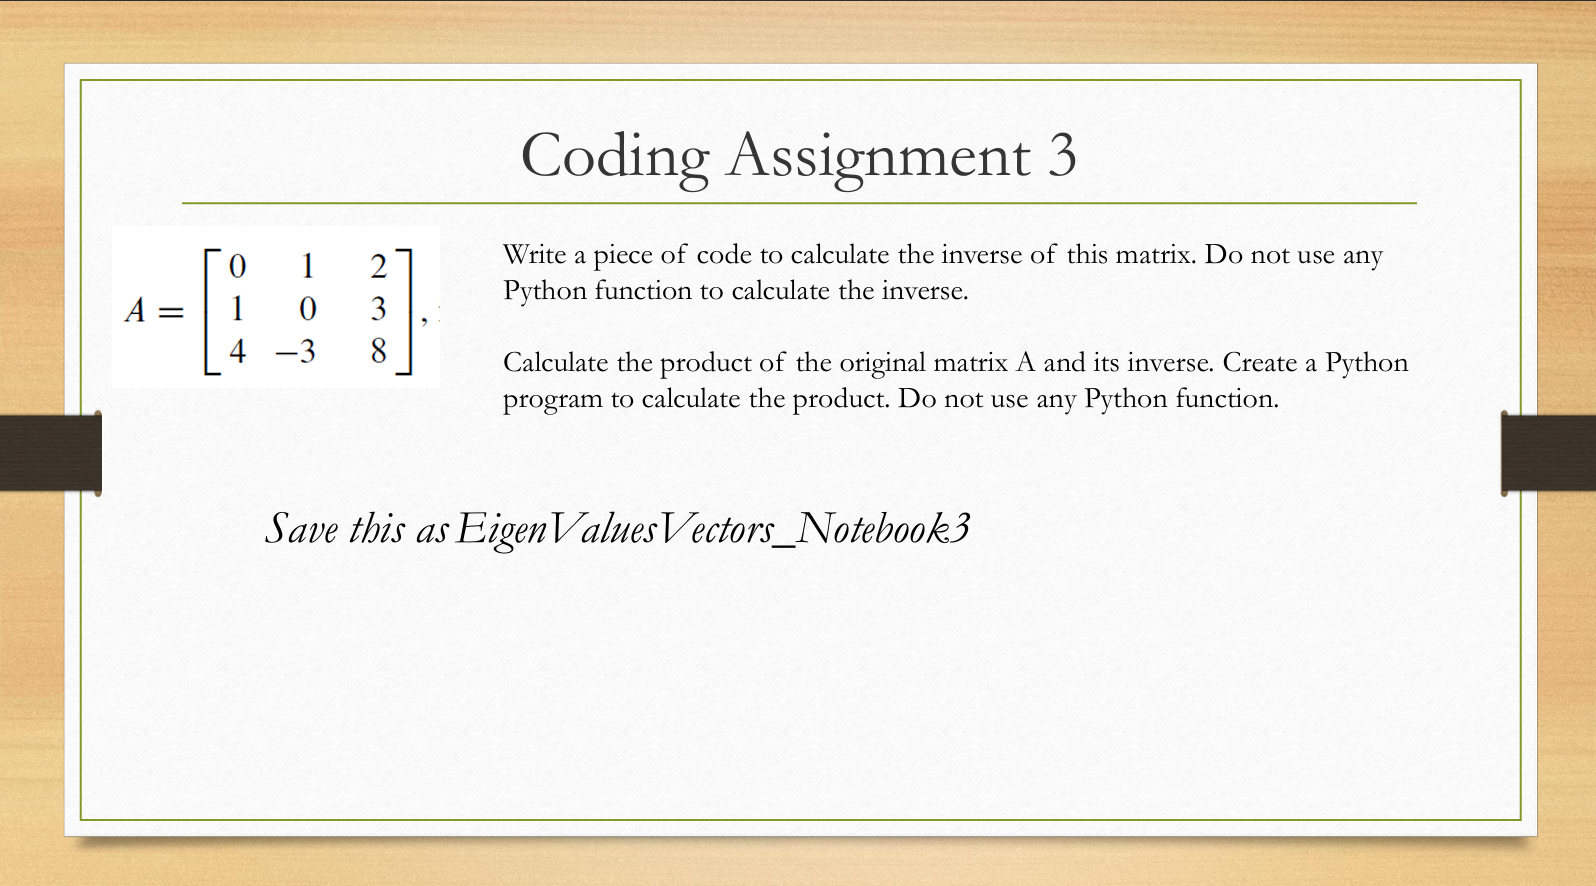

In [21]:
from IPython.display import Image, display

# Path to the uploaded image file
image_path = 'EVV3.png'

# Resize parameters
width = 800  # specify the width in pixels
height = 500  # specify the height in pixels

# Display the resized image
display(Image(filename=image_path, width=width, height=height))


#Problem Statement:
"Write a piece of code to calculate the inverse of the matrix. Do not use any Python function to calculate the inverse. Calculate the product of the original matrix A and its inverse. Create a Python function to calculate the product. Do not use any Python function."

#Solution Summary:

1. **Define the Matrix A**: Start by defining the matrix A for which you want to calculate the inverse and perform matrix multiplication.

2. **Apply Gaussian Elimination**: Use the Gaussian elimination method to transform the matrix A into row-echelon form, ultimately obtaining its inverse.

3. **Print the Inverse**: Once you have the inverse matrix, print it to display the result.

4. **Perform Matrix Multiplication**: Multiply the original matrix A by its inverse using matrix multiplication.

5. **Print the Product**: Print the resulting matrix obtained from the multiplication. Ideally, it should be the identity matrix if the calculations are correct.



###Import Library:
No, libraries are not needed for this implementation. The code provided implements the Gaussian elimination method and matrix multiplication function from scratch without relying on any external libraries like NumPy. It's a purely Pythonic solution that demonstrates the algorithmic process of calculating the inverse of a matrix and performing matrix multiplication.

###Define the given matrix A:

In [22]:
# Provided matrix A
A = [[0, 1, 2],
     [1, 0, 3],
     [4, -3, 8]]
#print A
A

[[0, 1, 2], [1, 0, 3], [4, -3, 8]]

###Apply Gaussian Elimination:

In [28]:
def gaussian_elimination(matrix):
    n = len(matrix)  # Get the size of the matrix
    for i in range(n):
        # Partial pivoting: find the row with the maximum value in the current column
        max_index = i
        for j in range(i + 1, n):
            if abs(matrix[j][i]) > abs(matrix[max_index][i]):
                max_index = j
        # Swap the current row with the row containing the maximum value
        matrix[i], matrix[max_index] = matrix[max_index], matrix[i]

        # Make the diagonal element of the current row 1
        divisor = matrix[i][i]
        if divisor == 0:
            raise ValueError("Matrix is singular, cannot find inverse.")
        for j in range(i, n * 2):
            matrix[i][j] /= divisor

        # Eliminate the non-diagonal elements below the diagonal
        for j in range(n):
            if i != j:
                multiplier = matrix[j][i]
                for k in range(i, n * 2):
                    matrix[j][k] -= multiplier * matrix[i][k]

    # Extract the right half of the augmented matrix (the inverse)
    inverse = [row[n:] for row in matrix]
    return inverse



[[0, 1, 2], [1, 0, 3], [4, -3, 8]]


In [24]:
# Augment matrix A with the identity matrix
n = len(A)
augmented_matrix = [row + [1 if i == j else 0 for j in range(n)] for i, row in enumerate(A)]

# Apply Gaussian elimination to get the inverse
inverse = gaussian_elimination(augmented_matrix)

# Print the inverse of matrix A
print("Inverse of matrix A:")
for row in inverse:
    print(row)

Inverse of matrix A:
[-4.5, 7.0, -1.5]
[-2.0, 4.0, -1.0]
[1.5, -2.0, 0.5]


###Matrix Multiplication:

In [25]:
def matrix_multiply(matrix1, matrix2):
    # Calculate the product of two matrices
    result = []
    for i in range(len(matrix1)):
        row = []
        for j in range(len(matrix2[0])):
            # Multiply the ith row of matrix1 with the jth column of matrix2
            product = sum(matrix1[i][k] * matrix2[k][j] for k in range(len(matrix2)))
            row.append(product)
        result.append(row)
    return result

In [26]:
# Calculate the product of matrix A and its inverse
product = matrix_multiply(A, inverse)

# Print the product of matrix A and its inverse
print("\nProduct of matrix A and its inverse:")
for row in product:
    print(row)


Product of matrix A and its inverse:
[1.0, 0.0, 0.0]
[0.0, 1.0, 0.0]
[0.0, 0.0, 1.0]
